In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

STUDENT_NAME = 'UTTEJ REDDY PAKANATI, SAI ANURAG NEELISETTY, KRISHNA KANTH MUTTA'

STUDENT_ID = '20875894, 20911061, 20919166'

In [11]:
def Fun_sigmoid(z): #sigmoid functon
    return 1 / (1 + np.exp(-z))

def Fun_sigmoid_derivative(z): #derivative of sigmoid function
    return np.multiply(z, 1-z)

"""The function "Initial_weights" will randomly initialize the weights of the network in the range [-1, 1]. This function takes
layers as input and returns weights as a multi-dimensional array. The argument contains first element as input layer, next are 
hidden layers and the last element as output layer. Here, numpy is being used to generate a random number in the range [-1, 1]
for each connection."""

def Initial_weights(layers_whole):
    layers, weights = len(layers_whole), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(layers_whole[i-1] + 1)]
              for j in range(layers_whole[i])]
        weights.append(np.matrix(w))
    return weights

"""The function "Accuracy1" will take input data, actual class and computed weights, pedicts the class of each object in its 
input and checks it against the actual class and returs the percentage of correct predictions."""

def Accuracy1(x_data, y_data, weights):
    corr = 0
    for i in range(len(x_data)):
        x, y = x_data[i], list(y_data[i])
        guess = Prediction(x, weights)
        if(y == guess):
            corr += 1
    return corr / len(x_data)

"""The fuction "Forward_propagation" will take the input data, weights as input. The output is computed by first calculating the
dot product between the input and the weights of the layer and then passing this dot product through an activation function. 
The output of each layer is the input of the next. The output of the final layer is the prediction of the network."""

def Forward_propagation(x_data, weights, layers):
    activations, layer_input = [x_data], x_data
    for j in range(layers):
        activation = Fun_sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Adding the bias
    
    return activations

"""The function "Network" will take training data, validation data, number of epochs, layers and the learning rate as
inputs. Frist, the weights of the network will get randomly initialized by the function Initial_weights. Then, in each epoch,
the weights will be updated and after all the epochs, accuracy of the training and validation sets will be printed. We are
considering the learning rate as 0.15 for our network"""

def Network(x_data, y_data, x_val=None, y_val=None, epochs=10, layers_whole=[], learn_rate=0.15):
    weights = Initial_weights(layers_whole)
    acc_train=[]
    acc_val=[]
    epoch_all=[]
    for epoch in range(1, epochs+1):
        weights = Training(x_data, y_data, learn_rate, weights)   

        if(epoch % 1 == 0):
           # print("Epoch {}".format(epoch))
           # print("Training Accuracy:{}".format(Accuracy1(x_data, y_data, weights)))
            acc_train.append(round(Accuracy1(x_data, y_data, weights),2))
            epoch_all.append(epoch)
            if x_val.any():
             #   print("Validation Accuracy:{}".format(Accuracy1(x_val, y_val, weights)))
                acc_val.append(round(Accuracy1(x_val, y_val, weights),2))
                
  #  from matplotlib import pyplot as plt
  #  plt.plot(epoch_all,acc_train);
  #  plt.plot(epoch_all,acc_val);
  #  plt.show()
            
    return weights

"""The function "Back_propagation" will take actual class, predicted output from forward propogation, computed weights, layers
and learning rate as inputs. First error will be calculated and then delta is calcuated as error of current layer times Sigmoid
derivation of current layer activation. Weights between the current and pervious layer are updated by using delta and learning
rate. In this manner, the function propogates the error backwards to perform the weight updations. """

def Back_propagation(y_data, activation_op, weights, layers_whole,learn_rate):
    out_final = activation_op[-1]
    error = np.matrix(y_data - out_final)
    
    for j in range(layers_whole, 0, -1):
        currActivation = activation_op[j]        
        if(j > 1):
            prevActivation = np.append(1, activation_op[j-1])
        else:
            prevActivation = activation_op[0]
        
        delta = np.multiply(error,  Fun_sigmoid_derivative(currActivation))
        weights[j-1] += learn_rate * np.multiply(delta.T, prevActivation)
        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w) 
    
    return weights

"""The function "Tranining" will take the input data, actual class, learning rate and initialized weights as input. It
first performs the forward propogation,then updates the weights by backward propogation and then final calculated weights
are returned"""

def Training(x_data, y_data, learn_rate, weights):
    layers = len(weights)
    for i in range(len(x_data)):
        x, y = x_data[i], y_data[i]
        x = np.matrix(np.append(1, x)) # Adding the bias
        activations = Forward_propagation(x, weights, layers)
        weights = Back_propagation(y, activations, weights, layers,learn_rate)

    return weights

"""The function "Prediction" will take the input data, computed weights as input. First, forward propogation of the input data 
is performed using the weights and output of the netwrok is calculated. The output is then converted to one-hot encoding format
using the Max_function"""

def Prediction(x_data, weights):
    layers_whole = len(weights)
    x_data = np.append(1, x_data) # Adding bias
    activation_op = Forward_propagation(x_data, weights, layers_whole)    
    out_final = activation_op[-1].A1
    inx = Max_function(out_final)
    # Initialize prediction vector to zeros
    y_pred = [0 for i in range(len(out_final))]
    y_pred[inx] = 1 
    return y_pred

"""The function "Max_function" will take the array of values as input and returns the index of the element with highest value"""

def Max_function(out):
    x, inx = out[0], 0
    for i in range(1, len(out)):
        if(out[i] > x):
            x, inx = out[i], i
    return inx

"""The function "Accuracy" will take input data and weights as input, predicts the output for all the input values and returns 
an array of the calculated outputs."""

def Accuracy(X, weights):
    result=[]
    for i in range(len(X)):
        x = X[i]
        guess = Prediction(x, weights)
        result.append(guess)
    result1=np.array(result)
    return result1

In [3]:
#loading the training data, lables of the training data and splitting it into training and validation datasets

df = pd.read_csv('train_data.csv',header=None)
arr = df.to_numpy()
df_class = pd.read_csv('train_labels.csv',header=None)
arr_class = df_class.to_numpy()
x_train, x_valid, y_train, y_valid = train_test_split(arr, arr_class, test_size = 0.2, random_state = 275)

Epoch 1
Training Accuracy:0.9655102762207747
Validation Accuracy:0.9606140173702282
Epoch 2
Training Accuracy:0.9712669797505429
Validation Accuracy:0.9664714199151686
Epoch 3
Training Accuracy:0.9732363783265162
Validation Accuracy:0.9680872550999798
Epoch 4
Training Accuracy:0.9772256728778468
Validation Accuracy:0.9701070490809938
Epoch 5
Training Accuracy:0.9772761702772307
Validation Accuracy:0.9703090284790952
Epoch 6
Training Accuracy:0.9786396000605969
Validation Accuracy:0.9719248636639063
Epoch 7
Training Accuracy:0.9797000454476594
Validation Accuracy:0.9721268430620077
Epoch 8
Training Accuracy:0.9794475584507398
Validation Accuracy:0.9719248636639063
Epoch 9
Training Accuracy:0.9814674544260971
Validation Accuracy:0.9717228842658049
Epoch 10
Training Accuracy:0.9811139726304096
Validation Accuracy:0.9721268430620077
Epoch 11
Training Accuracy:0.9799525324445791
Validation Accuracy:0.9717228842658049
Epoch 12
Training Accuracy:0.9821239206180882
Validation Accuracy:0.973540

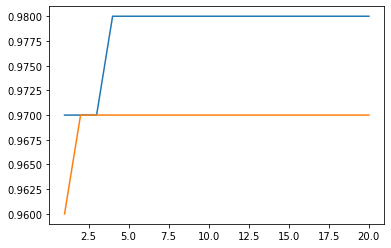

In [9]:
#calculating and plotting the traning and validation accuracies to check overfitting of the data

layers = [len(x_train[0]) ,5, len(y_train[0])] # Number of nodes in layers
weights = Network(x_train, y_train,x_valid, y_valid, epochs=20,layers_whole=layers, learn_rate=0.15);

Analyzing the above plot on the validation and training accuracy, we see that the accuracy stops increasing on validation set from epoch 4 but keeps increasing on training set resulting in overfitting. Hence, we must stop the traning at epoch 4 to avoid the problem of overfitting.

In [12]:
#calcuting the weights of the network with number of epochs for training the data as 4.

layers = [len(x_train[0]) ,5, len(y_train[0])] # Number of nodes in layers
weights = Network(x_train, y_train,x_valid, y_valid, epochs=4,layers_whole=layers, learn_rate=0.15);

In [13]:
weights

[matrix([[ 1.03869105, -0.56764909, -0.46472652, ..., -0.09655005,
          -0.39338642,  0.69626284],
         [ 0.49678538,  0.68567222,  0.50373969, ...,  0.44512408,
          -0.6314685 , -0.0116429 ],
         [ 0.65868166,  0.21691882,  0.80007177, ..., -0.49972123,
           0.98002777,  0.38861324],
         [ 0.57548069, -0.68572412,  0.99386244, ...,  0.30837376,
           0.84731969, -0.33223822],
         [ 0.14317477, -0.75835142, -0.57020418, ...,  0.53233953,
          -0.92908648, -0.4220319 ]]),
 matrix([[ 0.14112499, -5.63732223,  2.89433914, -3.93787854,  0.75799228,
          -2.37439344],
         [-1.3761052 , -1.85391977, -3.77237515,  3.06458006, -0.89199365,
           5.37390764],
         [-5.92830349,  4.15491505,  4.4962526 ,  3.60184518, -2.15989215,
          -4.35631108],
         [-0.43171585,  4.02474298, -4.63983482, -3.90535804,  0.08465009,
          -4.11643865]])]

In [14]:
import pickle
with open('A1_G55.pkl','wb') as pickle_file:
    pickle.dump(weights, pickle_file)

### Summary

Above is our implementation of backpropagation algorithm. First, we initialize the weights for the network. Next, forward propogation is performed using the initialized weights and then the weights are updated using backpropagation. Prediction is done using the finalized weights.

Parameters:

Activation Function - Sigmoid     
Learning Rate - 0.15     
Output function for one-hot encoding - Max_function (user defined)    
No of hidden layers - 1 (As suggested)    
No of nodes in hidden layer - 5    
No of epochs for training - 20, 4(final)    


Once the training is done, the resultant weights are stored in A1_G55.pkl file. 

test_mlp.py file contains the function which will load the weights from .pkl file and gives the predictions.